<a href="https://colab.research.google.com/github/Mahrokh-Eb/Deep-Learning-with-Python/blob/main/1-Image%20Classification%20(cats%20VS%20dogs)/seedPlant/plantSeeding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/plantSeed

/content/drive/MyDrive/plantSeed


In [3]:
%ls

drive/   model_utils.py      plantSeeding-v2.ipynb  __pycache__/  utils.py
kaggle/  plantSeeding.ipynb  predict_utils.py       train.py      vis_utils.py


In [4]:
pwd

'/content/drive/MyDrive/plantSeed'

In [5]:
!pip3 install bcolz 

     |████████████████████████████████| 1.5 MB 31.0 MB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp37-cp37m-linux_x86_64.whl size=2646928 sha256=3b234427d40c82533245127fa693c57bea6c2c8ce3aae98401a991df32d2d6bd
  Stored in directory: /root/.cache/pip/wheels/2c/35/ca/9d914de345914e2446ea285170329f771b8abba2a00f7650bd
Successfully built bcolz


In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import math
import time
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

# Our libraries
from train import train_model
from model_utils import *
from predict_utils import *
from vis_utils import *

#Kaggle

In [7]:
pip install kaggle

In [8]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/plantSeed/drive"

In [9]:
#Change your present working directory
%cd /content/drive/MyDrive/plantSeed/drive

/content/drive/MyDrive/plantSeed/drive


In [10]:
pwd

'/content/drive/My Drive/plantSeed/drive'

In [16]:
#copy API from dataset section in kaggle website
!kaggle competitions download -c plant-seedlings-classification

100% 1.68G/1.69G [00:18<00:01, 5.58MB/s]
100% 1.69G/1.69G [00:18<00:00, 96.1MB/s]


In [18]:
!ls

0021e90e4.png  00ef713a8.png  03ef36742.png  060f1dc84.png
003d61042.png  01291174f.png  043449b0b.png  06a64ac47.png
007b3da8b.png  026716f9b.png  0437393b1.png  kaggle.json
0086a6340.png  02cfeb38d.png  04814f36d.png  plant-seedlings-classification.zip
00c47e980.png  03566743d.png  05341a8a6.png
00d090cde.png  03a2ee656.png  055922489.png
00e049fe8.png  03e322a29.png  060450d79.png


In [22]:
#unzipping the zip files and deleting the zip files
#!unzip \*.zip  && rm *.zip

In [20]:
!ls

0021e90e4.png  00ef713a8.png  03ef36742.png  060f1dc84.png
003d61042.png  01291174f.png  043449b0b.png  06a64ac47.png
007b3da8b.png  026716f9b.png  0437393b1.png  kaggle.json
0086a6340.png  02cfeb38d.png  04814f36d.png  sample_submission.csv
00c47e980.png  03566743d.png  05341a8a6.png  test
00d090cde.png  03a2ee656.png  055922489.png  train
00e049fe8.png  03e322a29.png  060450d79.png


In [23]:
DATA_DIR ='/content/drive/MyDrive/plantSeed/drive/'

sz = 224
batch_size = 16

In [24]:
#os.listdir(DATA_DIR)

In [26]:
trn_dir = DATA_DIR
test_dir = f'{DATA_DIR}test1'

In [28]:
trn_fnames = glob.glob(f'{trn_dir}/*')
trn_fnames[:5]

['/content/drive/MyDrive/plantSeed/drive/kaggle.json',
 '/content/drive/MyDrive/plantSeed/drive/0021e90e4.png',
 '/content/drive/MyDrive/plantSeed/drive/0086a6340.png',
 '/content/drive/MyDrive/plantSeed/drive/007b3da8b.png',
 '/content/drive/MyDrive/plantSeed/drive/02cfeb38d.png']

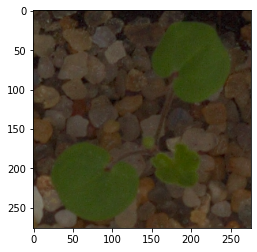

In [30]:
img = plt.imread(trn_fnames[5])
plt.imshow(img);